# Extração

In [3]:
import pandas as pd
import json

In [4]:
import json
import pandas as pd

caminho_arquivo = '../data/TelecomX_Data.json'

# Carregar os dados do JSON
with open(caminho_arquivo, 'r') as file:
    dados = json.load(file)

# Converter para DataFrame
df = pd.DataFrame(dados)

In [5]:
# Informações básicas do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [4]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [5]:
df.shape

(7267, 6)

In [6]:
df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# Transformação

In [6]:
colunas = [col for col in df.columns if isinstance(df[col].iloc[0],dict)]
for coluna in colunas:
    df_coluna_dict = pd.json_normalize(df[coluna])
    print(f'COluna master: {coluna} >>>{df_coluna_dict.columns}')
    df= pd.concat([df, df_coluna_dict], axis=1)
df = df.drop(columns=colunas)
df.columns

COluna master: customer >>>Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'], dtype='object')
COluna master: phone >>>Index(['PhoneService', 'MultipleLines'], dtype='object')
COluna master: internet >>>Index(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')
COluna master: account >>>Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [7]:
df.shape

(7267, 21)

In [8]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [9]:
colunas_dict = [col for col in df.columns if isinstance(df[col].iloc[0],dict)]
colunas_dict

[]

In [10]:
df.columns = df.columns.str.replace('.', '_', regex=False)

In [11]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [12]:
for col in df.columns:
    # Tenta converter para número, se não conseguir mantém como está
    df[col] = pd.to_numeric(df[col], errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


C:\Users\User\AppData\Local\Temp\ipykernel_1780\3823660558.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [13]:
df.Charges_Total.isnull().value_counts()

Charges_Total
False    7267
Name: count, dtype: int64

In [14]:
df.Charges_Total = pd.to_numeric(df.Charges_Total, errors='coerce')
df.Charges_Total.isnull().value_counts()

Charges_Total
False    7256
True       11
Name: count, dtype: int64

1391.0

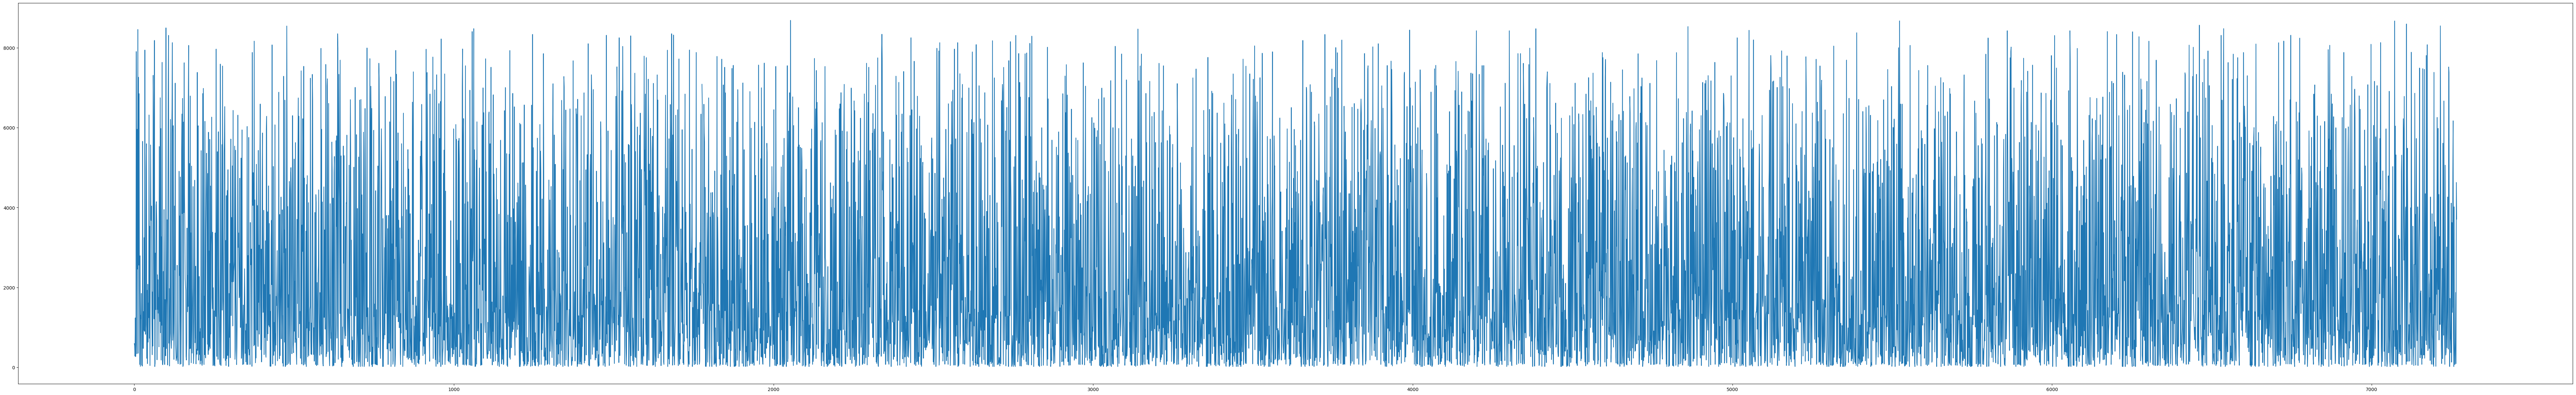

In [15]:
df['Charges_Total'].plot(figsize=(100,15))
df.Charges_Total.median()

In [16]:
df.Charges_Monthly.corr(df.Charges_Total)

np.float64(0.6521086225230758)

In [17]:
df[df.Charges_Total.isna()].head(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [18]:
import numpy as np

# Função para imputar Charges_Total usando Charges_Monthly vizinhos
def imputar_charge_total(row, df, tol=5):
    if np.isnan(row['Charges_Total']):
        # Seleciona registros com Charges_Monthly dentro do intervalo
        cond = (df['Charges_Monthly'] >= row['Charges_Monthly'] - tol) & \
               (df['Charges_Monthly'] <= row['Charges_Monthly'] + tol) & \
               (df['Charges_Total'].notna())
        vizinhos = df.loc[cond, 'Charges_Total']
        
        if not vizinhos.empty:
            return vizinhos.mean()  # ou .median()
        else:
            return np.nan  # não encontrou vizinhos para imputar
    else:
        return row['Charges_Total']

# Aplica a função no DataFrame
df['Charges_Total'] = df.apply(imputar_charge_total, axis=1, args=(df,))


In [19]:
df[df.Charges_Total.isna()].head(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total


In [20]:
#verificando alguma incoerencia nos dados imputados
df[df.index.isin([975, 1775, 1955, 2075, 2232, 2308, 2930,3134, 3203])][['Charges_Monthly','Charges_Total']]

,Charges_Monthly,Charges_Total
975,56.05,1730.683592
1775,20.00,595.047447
1955,61.90,2292.350937
2075,19.70,572.002041
2232,20.25,606.845880
2308,25.35,784.487799
2930,73.35,1699.945595
3134,25.75,869.866890
3203,52.55,1279.476147


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [22]:
for col in df.columns:
    print(f'Coluna: {col}')
    print(f'Tipo: {df[col].dtype}')
    print(f'Valores únicos: {df[col].nunique()}')
    print(f'Valores nulos: {df[col].isnull().sum()}')
    print('---')

Coluna: customerID
Tipo: object
Valores únicos: 7267
Valores nulos: 0
---
Coluna: Churn
Tipo: object
Valores únicos: 3
Valores nulos: 0
---
Coluna: gender
Tipo: object
Valores únicos: 2
Valores nulos: 0
---
Coluna: SeniorCitizen
Tipo: int64
Valores únicos: 2
Valores nulos: 0
---
Coluna: Partner
Tipo: object
Valores únicos: 2
Valores nulos: 0
---
Coluna: Dependents
Tipo: object
Valores únicos: 2
Valores nulos: 0
---
Coluna: tenure
Tipo: int64
Valores únicos: 73
Valores nulos: 0
---
Coluna: PhoneService
Tipo: object
Valores únicos: 2
Valores nulos: 0
---
Coluna: MultipleLines
Tipo: object
Valores únicos: 3
Valores nulos: 0
---
Coluna: InternetService
Tipo: object
Valores únicos: 3
Valores nulos: 0
---
Coluna: OnlineSecurity
Tipo: object
Valores únicos: 3
Valores nulos: 0
---
Coluna: OnlineBackup
Tipo: object
Valores únicos: 3
Valores nulos: 0
---
Coluna: DeviceProtection
Tipo: object
Valores únicos: 3
Valores nulos: 0
---
Coluna: TechSupport
Tipo: object
Valores únicos: 3
Valores nulos: 

In [23]:
df.describe()

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2279.044861
std,0.369074,24.571773,30.129572,2267.441998
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,401.400000
50%,0.000000,29.000000,70.300000,1390.600000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [25]:
df_dummies = pd.get_dummies(df, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
], drop_first=True)

# Pega as colunas que foram criadas pelas dummies (só booleanas)
colunas_dummies = [col for col in df_dummies.columns if df_dummies[col].dtype == 'bool']

# Converte só essas colunas para int
df_dummies[colunas_dummies] = df_dummies[colunas_dummies].astype(int)


In [26]:
df_dummies.columns

Index(['customerID', 'Churn', 'SeniorCitizen', 'tenure', 'Charges_Monthly',
       'Charges_Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df_dummies.head(3)

,customerID,Churn,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,No,0,9,65.6,593.30,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,No,0,9,59.9,542.40,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Yes,0,4,73.9,280.85,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [28]:
print(df['Churn'].value_counts(normalize=True))


Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


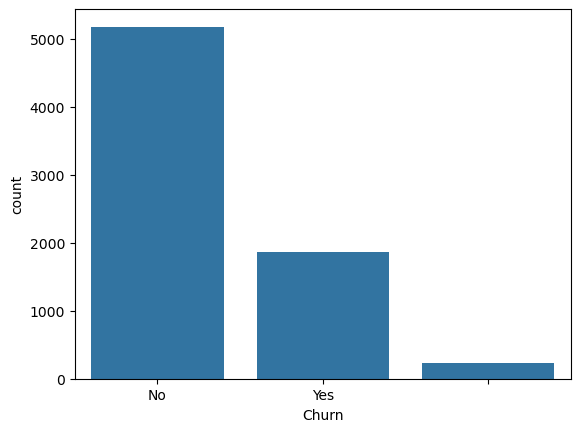

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.show()


In [30]:
df[~df.Churn.isin(['Yes','No'])].Churn

30       
75       
96       
98       
175      
       ..
7158     
7180     
7211     
7239     
7247     
Name: Churn, Length: 224, dtype: object

In [31]:
df.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [32]:
df_dummies.PhoneService_Yes.value_counts()

PhoneService_Yes
1    6560
0     707
Name: count, dtype: int64

In [33]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7267 non-null   object 
 1   Churn                                  7267 non-null   object 
 2   SeniorCitizen                          7267 non-null   int64  
 3   tenure                                 7267 non-null   int64  
 4   Charges_Monthly                        7267 non-null   float64
 5   Charges_Total                          7267 non-null   float64
 6   gender_Male                            7267 non-null   int64  
 7   Partner_Yes                            7267 non-null   int64  
 8   Dependents_Yes                         7267 non-null   int64  
 9   PhoneService_Yes                       7267 non-null   int64  
 10  MultipleLines_No phone service         7267 non-null   int64  
 11  Mult

In [34]:
df_dummies.columns = df_dummies.columns.str.replace(' ', '_')
df_dummies.columns = df_dummies.columns.str.replace('-', '_')
df_dummies.columns = df_dummies.columns.str.replace('(', '')
df_dummies.columns = df_dummies.columns.str.replace(')', '')




In [35]:
colunas_categoricas = df_dummies.select_dtypes(include=['object']).columns.tolist()
print(colunas_categoricas)
for col in colunas_categoricas:
    print(f'Valores únicos de {col}:')
    print(df[col].value_counts(dropna=False))
    print('-'*40)


['customerID', 'Churn']
Valores únicos de customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9938-ZREHM    1
9940-HPQPG    1
             ..
0013-SMEOE    1
0014-BMAQU    1
0015-UOCOJ    1
0016-QLJIS    1
0017-DINOC    1
Name: count, Length: 7267, dtype: int64
----------------------------------------
Valores únicos de Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
----------------------------------------


In [36]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7267 non-null   object 
 1   Churn                                 7267 non-null   object 
 2   SeniorCitizen                         7267 non-null   int64  
 3   tenure                                7267 non-null   int64  
 4   Charges_Monthly                       7267 non-null   float64
 5   Charges_Total                         7267 non-null   float64
 6   gender_Male                           7267 non-null   int64  
 7   Partner_Yes                           7267 non-null   int64  
 8   Dependents_Yes                        7267 non-null   int64  
 9   PhoneService_Yes                      7267 non-null   int64  
 10  MultipleLines_No_phone_service        7267 non-null   int64  
 11  MultipleLines_Yes

In [45]:
df_dummies.select_dtypes(include='bool').columns

Index([], dtype='object')

In [47]:
df['Churn'].value_counts(dropna=False)


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [49]:
df_dummies['Churn'].value_counts(dropna=False)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [52]:
df_dummies = df_dummies.replace('',np.nan)

In [53]:
df_dummies['Churn'].value_counts(dropna=False)

Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64

In [54]:
df_dummies= df_dummies.dropna(subset = ['Churn'])

In [55]:
df_dummies['Churn'].value_counts(dropna=False)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_dummies['Churn'] = label_encoder.fit_transform(df_dummies['Churn'])


In [65]:
df_dummies.Churn

0       0
1       0
2       1
3       1
4       1
       ..
7262    0
7263    1
7264    0
7265    0
7266    0
Name: Churn, Length: 7043, dtype: int64

In [66]:
df_dummies.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

# Carga e Análise

In [67]:
[print(col) for col in df_dummies.select_dtypes(include='object')]

customerID


[None]

In [68]:
# Mostrar formato do dataframe: linhas e colunas
print("Shape do dataframe:", df_dummies.shape)

# Mostrar tipos de dados e contagem de valores nulos em cada coluna
print("\nInformações sobre colunas, tipos e valores nulos:")
print(df_dummies.info())

# Estatísticas descritivas para variáveis numéricas
print("\nEstatísticas descritivas das variáveis numéricas:")
print(df_dummies.describe())

# Para as variáveis categóricas (se ainda houver), ver a contagem de valores únicos
print("\nContagem de valores únicos em colunas do tipo 'object':")
for col in df_dummies.select_dtypes(include='object').columns:
    print(f"Coluna: {col}")
    print(df_dummies[col].value_counts(dropna=False))
    print()


Shape do dataframe: (7043, 32)

Informações sobre colunas, tipos e valores nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7043 non-null   object 
 1   Churn                                 7043 non-null   int64  
 2   SeniorCitizen                         7043 non-null   int64  
 3   tenure                                7043 non-null   int64  
 4   Charges_Monthly                       7043 non-null   float64
 5   Charges_Total                         7043 non-null   float64
 6   gender_Male                           7043 non-null   int64  
 7   Partner_Yes                           7043 non-null   int64  
 8   Dependents_Yes                        7043 non-null   int64  
 9   PhoneService_Yes                      7043 non-null   int64  
 10  Multipl

In [70]:
df_final = df_dummies.drop(columns=['customerID'])

In [71]:
df_final.to_csv('../data/data_challenge_alura_telecom.csv',index=False)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


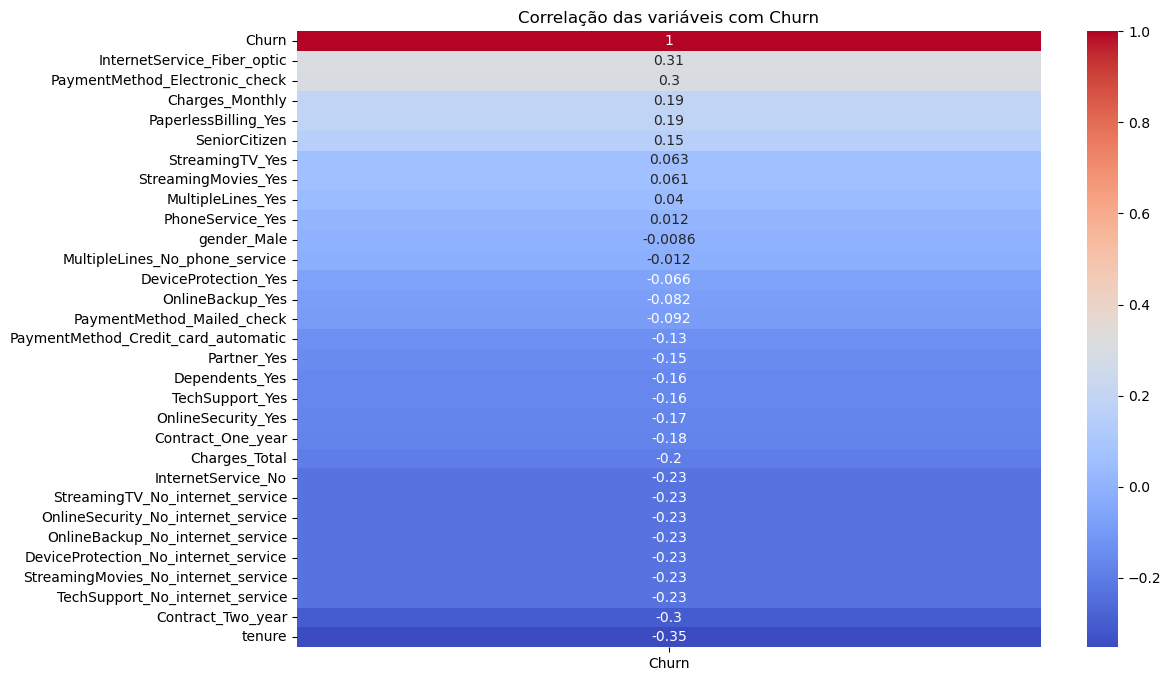

In [72]:
print(df_final['Churn'].value_counts(normalize=True))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df_final.corr()[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das variáveis com Churn')
plt.show()


In [75]:
df_final.corr()['Churn'].sort_values(ascending=True)

tenure                                 -0.352229
Contract_Two_year                      -0.302253
OnlineBackup_No_internet_service       -0.227890
InternetService_No                     -0.227890
TechSupport_No_internet_service        -0.227890
StreamingMovies_No_internet_service    -0.227890
DeviceProtection_No_internet_service   -0.227890
OnlineSecurity_No_internet_service     -0.227890
StreamingTV_No_internet_service        -0.227890
Charges_Total                          -0.198943
Contract_One_year                      -0.177820
OnlineSecurity_Yes                     -0.171226
TechSupport_Yes                        -0.164674
Dependents_Yes                         -0.164221
Partner_Yes                            -0.150448
PaymentMethod_Credit_card_automatic    -0.134302
PaymentMethod_Mailed_check             -0.091683
OnlineBackup_Yes                       -0.082255
DeviceProtection_Yes                   -0.066160
MultipleLines_No_phone_service         -0.011942
gender_Male         

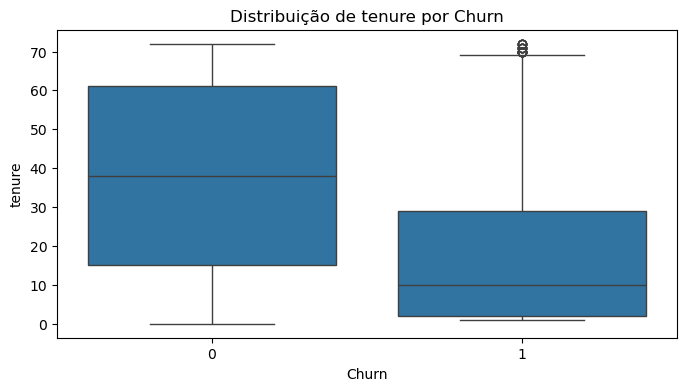

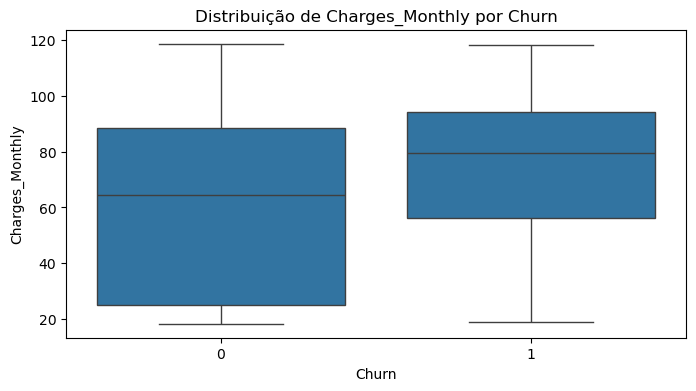

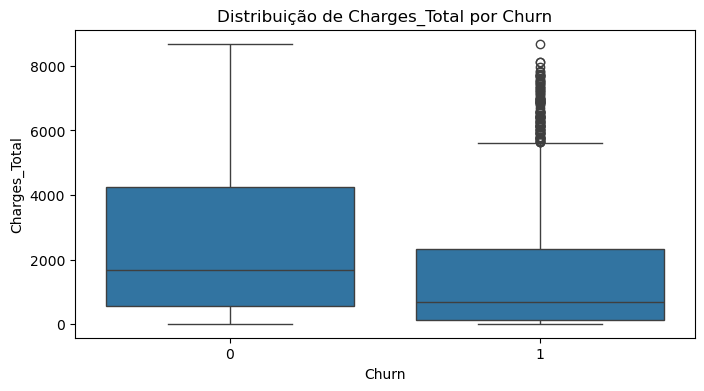

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['tenure', 'Charges_Monthly', 'Charges_Total']

for col in cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df_final)
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()
# Boxplot das variaveis mais corelacionadas ao Churn

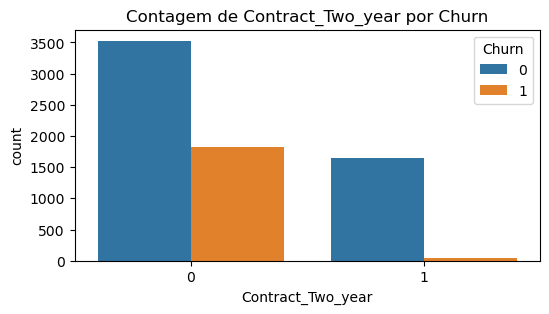

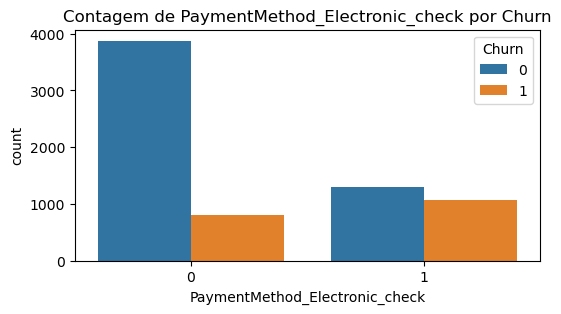

In [82]:
for col in ['Contract_Two_year', 'PaymentMethod_Electronic_check']:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Churn', data=df_final)
    plt.title(f'Contagem de {col} por Churn')
    plt.show()


Tabela de contagem para Contract_Two_year por Churn:
Churn                 0     1
Contract_Two_year            
0                  3527  1821
1                  1647    48




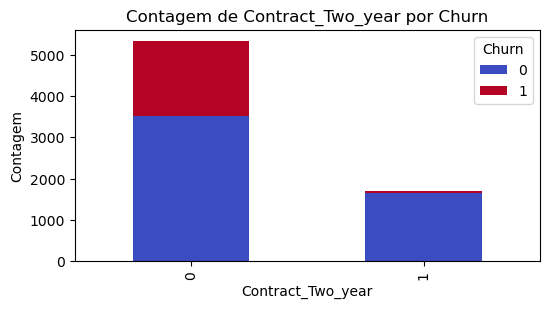

Tabela de contagem para PaymentMethod_Electronic_check por Churn:
Churn                              0     1
PaymentMethod_Electronic_check            
0                               3880   798
1                               1294  1071




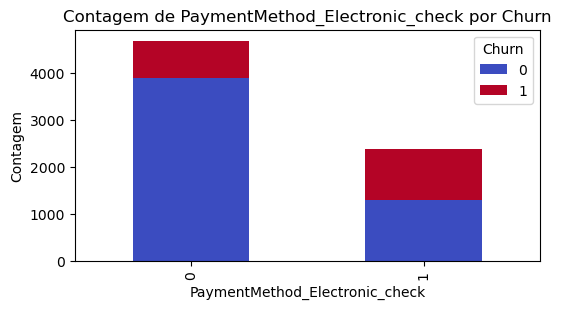

In [83]:
for col in ['Contract_Two_year', 'PaymentMethod_Electronic_check']:
    # Agrupa pela coluna e pela variável Churn e conta os registros
    tabela = df_final.groupby([col, 'Churn']).size().unstack(fill_value=0)
    print(f"Tabela de contagem para {col} por Churn:")
    print(tabela)
    print("\n")

    # Plotar gráfico de barras empilhadas com seaborn ou matplotlib
    tabela.plot(kind='bar', stacked=True, figsize=(6,3), colormap='coolwarm')
    plt.title(f'Contagem de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.show()


# Relatório Final – Desafio Telecom X

## 1. Extração dos Dados  
Primeiramente, carreguei o arquivo com os dados fornecidos, que continham informações dos clientes da empresa de telecomunicações, incluindo dados demográficos, serviços contratados e se o cliente havia cancelado o serviço (Churn).

## 2. Limpeza e Transformação  
Notei que algumas colunas tinham valores faltantes, principalmente nas variáveis categóricas. Foi preciso tratar esses dados para garantir que o modelo pudesse entender as informações corretamente.

Para as variáveis categóricas, utilizei o método **One-Hot Encoding** para transformar as categorias em variáveis numéricas, criando colunas binárias para cada categoria (exemplo: “Contract_Two_year” = 1 para clientes com contrato de dois anos, 0 caso contrário). Para evitar redundância, utilizei o parâmetro `drop_first=True`, eliminando uma categoria base de cada variável.

Além disso, converti a variável alvo **Churn** (que indicava se o cliente cancelou ou não o serviço) em valores numéricos: 1 para "Yes" e 0 para "No". Isso facilita a análise e a aplicação de modelos futuros.

## 3. Análise Exploratória (EDA)  
Com os dados tratados, fiz uma análise inicial para entender melhor o perfil dos clientes e identificar quais variáveis tinham maior relação com o cancelamento:

- Verifiquei o balanceamento da variável **Churn** e constatei que cerca de 26% dos clientes haviam cancelado.
- Calculei a correlação entre as variáveis numéricas e o churn para identificar os fatores que mais influenciam a saída dos clientes. Por exemplo, o tempo de contrato e a ausência de certos serviços (como backup online) tiveram correlação negativa com o churn, ou seja, são fatores que tendem a reduzir a chance de cancelamento.
- Explorei também variáveis categóricas específicas, como tipo de contrato e método de pagamento, para visualizar o comportamento do churn em cada grupo.

## 4. Insights Obtidos  
- Clientes com contratos mais longos (dois anos) tendem a cancelar menos.
- Serviços relacionados a suporte técnico e backup online também parecem influenciar positivamente a retenção dos clientes.
- Alguns métodos de pagamento, como o pagamento eletrônico, estão associados a maior churn, indicando possíveis áreas para melhorias no relacionamento.
- O valor mensal da fatura e o tempo de permanência (tenure) são indicadores importantes para prever o cancelamento.

## 5. Próximos Passos  
Com os dados limpos e o entendimento inicial, o próximo passo seria construir modelos preditivos para identificar clientes com maior risco de churn, ajudando a empresa a direcionar estratégias de retenção.
